Initial Analysis of all stock data and extraction of stocks to further analyze

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import datetime
from collections import defaultdict 

In [26]:
def get_data(ticker):
    start = datetime.datetime(2013, 1, 1)
    end = datetime.datetime(2022, 12, 31)
    data =  yf.download(ticker, progress=True, actions=True,start=start, end=end)
    data = pd.DataFrame(data)
    data.drop(['Close', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    data.rename(columns = {'Adj Close':"Close"}, inplace=True)
    data['returns'] = np.log(data["Close"] / data["Close"].shift(1))

    data.dropna(inplace=True)
    
    return data

In [27]:
stocks = {  
            "google": get_data("GOOG"),
            "amazon": get_data("AMZN"),
            "microsoft":get_data("MSFT"), 
            "meta": get_data("META"), 
            "apple": get_data("AAPL")
        }

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [28]:
price_df = pd.DataFrame()

for ticker in stocks.keys():
    price_df[ticker] = stocks[ticker].Close


Most stocks seem to be around the same prices. However, Microsoft and Meta closing prices seem to be greater. This is important as regression metrics may be greater for similar performance between the google and microsoft models for example.

In [29]:
price_df.describe()

,google,amazon,microsoft,meta,apple
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,59.332074,73.804250,116.106537,155.468756,60.240409
std,35.166703,53.286305,89.907248,83.790909,48.914537
min,17.506132,12.411500,21.586502,22.875729,11.982234
25%,29.990339,22.004999,41.017231,86.817886,24.517963
50%,51.435501,59.791500,80.453606,151.219559,39.261971
75%,73.811501,107.783501,195.281860,194.263885,89.611076
max,150.709000,186.570496,336.315277,381.774933,179.724579


All stock prices highly correlated with each other, this is important as further modelling can be specific to say the Google stock data from now on and can assume the same methodology will be generalisable to the other stock data. This assumption has been made as highly correlated stock prices could share same market conditions (industry, affected by same unforseen circumstances such as chip shortages etc).

In [30]:
price_df.corr()

,google,amazon,microsoft,meta,apple
google,1.000000,0.924248,0.980998,0.857566,0.964440
amazon,0.924248,1.000000,0.943975,0.925397,0.903229
microsoft,0.980998,0.943975,1.000000,0.835679,0.983049
meta,0.857566,0.925397,0.835679,1.000000,0.773110
apple,0.964440,0.903229,0.983049,0.773110,1.000000


Microsoft always greater than google stock price

In [31]:
len(np.where(price_df["microsoft"] > price_df["google"])[0])

2517

Closing price comparison

Can see sharp dips in price in all stocks around the same time, which is important because this will have an effect on the training of the model as theres only 1 instance in each stock of such a downward trend, meaning that if the model is not trained at all on the downward trend then this could result in poor results. Also as each stock has one at the same time, can focus on one stock and generalise to other stocks later

/tmp/ipykernel_6173/1337806299.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


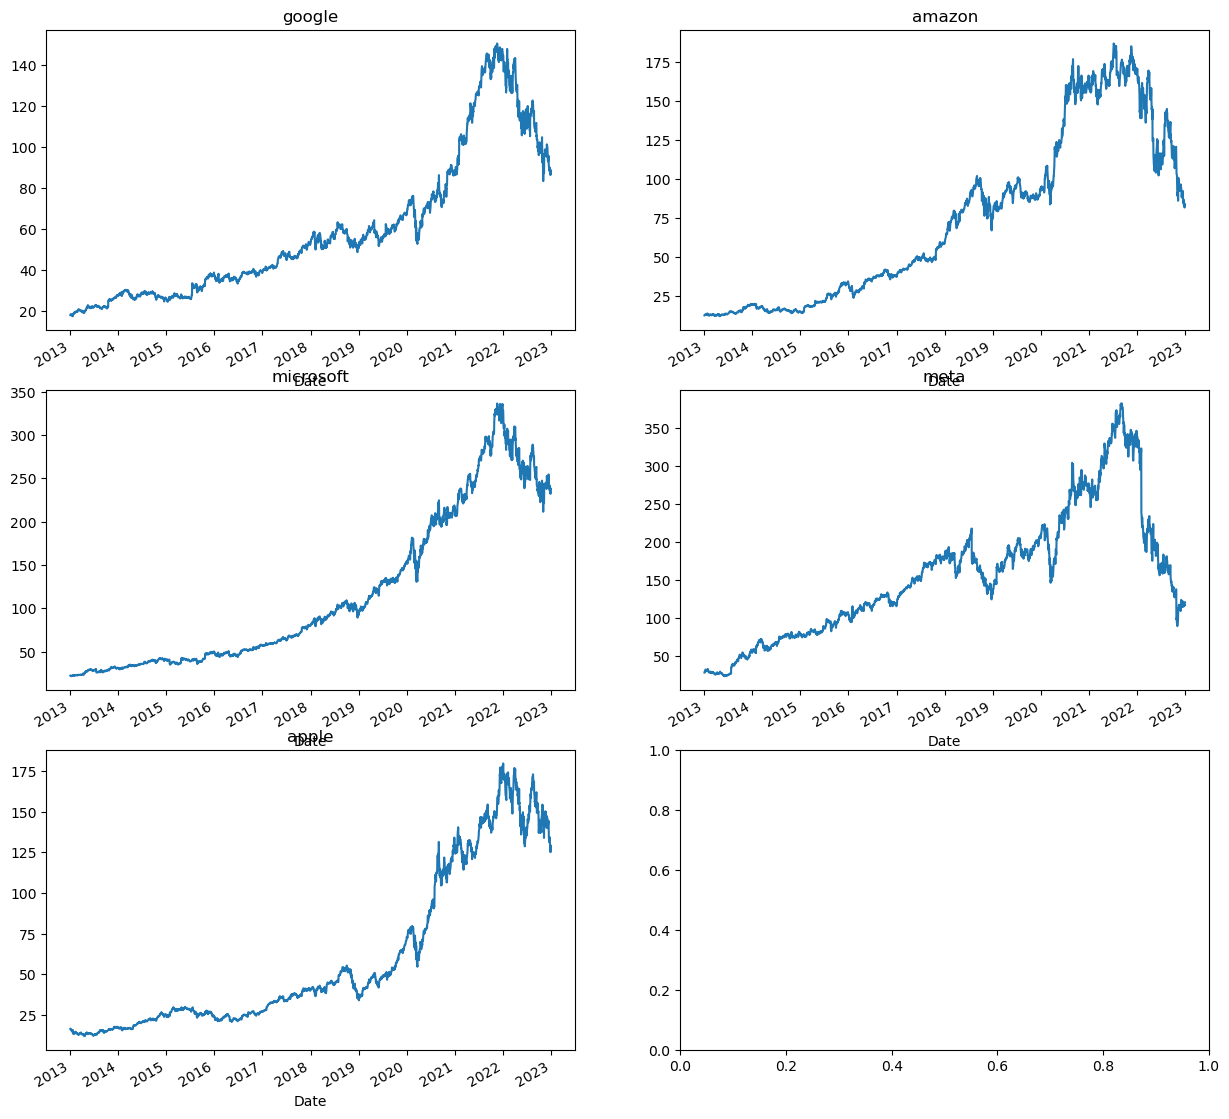

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

stocks["google"].Close.plot(ax=axes[0,0], title="google")
stocks["amazon"].Close.plot(ax=axes[0,1], title="amazon")
stocks["microsoft"].Close.plot(ax=axes[1,0], title="microsoft")
stocks["meta"].Close.plot(ax=axes[1,1], title="meta")
stocks["apple"].Close.plot(ax=axes[2,0], title="apple")

fig.show()

Daily returns comparisons

Less variance in the daily price changes between the stocks than closing price, could be a target variable, however graphs look like they contain a lot of white noise which may not be suitable for neural networks

In [34]:
returns_df = pd.DataFrame()

for ticker in stocks.keys():
    returns_df[ticker] = stocks[ticker].returns

In [35]:
returns_df.describe()

,google,amazon,microsoft,meta,apple
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,0.000633,0.000745,0.000935,0.000579,0.000811
std,0.017013,0.020504,0.017037,0.024200,0.018337
min,-0.117667,-0.151398,-0.159453,-0.306391,-0.137708
25%,-0.006796,-0.008592,-0.006576,-0.009731,-0.007544
50%,0.000698,0.001043,0.000827,0.001030,0.000765
75%,0.008832,0.011039,0.009394,0.012385,0.010302
max,0.148872,0.132178,0.132929,0.259371,0.113157


In [36]:
returns_df.corr()

,google,amazon,microsoft,meta,apple
google,1.000000,0.633324,0.701647,0.596629,0.575837
amazon,0.633324,1.000000,0.594996,0.545282,0.507772
microsoft,0.701647,0.594996,1.000000,0.512818,0.628845
meta,0.596629,0.545282,0.512818,1.000000,0.480501
apple,0.575837,0.507772,0.628845,0.480501,1.000000


/tmp/ipykernel_6173/2786193821.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


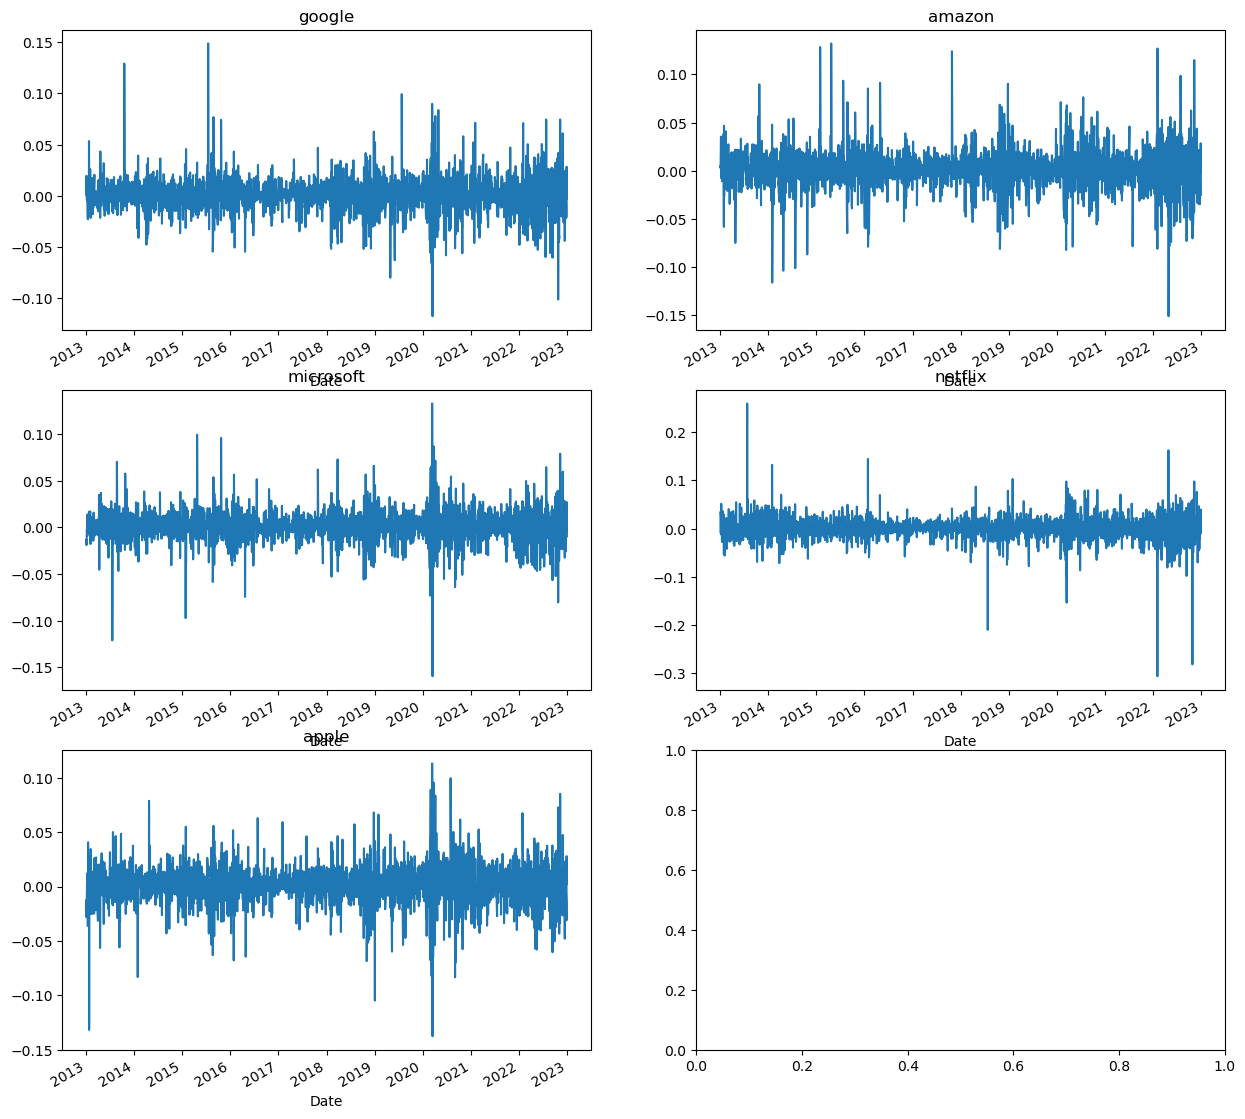

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
stocks["google"].returns.plot(ax=axes[0,0], title="google")
stocks["amazon"].returns.plot(ax=axes[0,1], title="amazon")
stocks["microsoft"].returns.plot(ax=axes[1,0], title="microsoft")
stocks["meta"].returns.plot(ax=axes[1,1], title="netflix")
stocks["apple"].returns.plot(ax=axes[2,0], title="apple")

fig.show()